In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
import matplotlib
import os
import datetime as dt 

In [17]:
# Setting up datetime object of that fateful day
the_decision = dt.datetime(2010, 7,8, 0,0,0)
# https://www.cbssports.com/nba/news/rudy-gobert-touched-every-microphone-at-jazz-media-availability-monday-now-reportedly-has-coronavirus/
rudy_gobert = dt.datetime(2020, 12, 12, 0,0,0)

In [61]:
# Reading in our dataset -- produced by get_job_data script
data_path = os.path.join(".", "data", "job_quits_formatted.csv")#"jobs_data_quits.csv")
df = pd.read_csv(data_path)

In [62]:
df.head()

,Unnamed: 0,year,period,series_id,value,total_quits
0,0,2000,M12,JTU000000000000000QUL,2331,2331000
1,1,2001,M01,JTU000000000000000QUL,3425,3425000
2,2,2001,M02,JTU000000000000000QUL,2472,2472000
3,3,2001,M03,JTU000000000000000QUL,2615,2615000
4,4,2001,M04,JTU000000000000000QUL,3312,3312000


In [63]:
# Cleaning the dataset a bit
df['month'] = df['period'].str.replace("M", "")  # replacing mont codes with just month #
df['date'] = df['year'].astype(str) + "-" + df['month']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

In [26]:
# Getting separate sub dfs for post and post decision
post_decision = df.loc[df['date'] > the_decision]
pre_decision = df.loc[df['date'] < the_decision]

In [27]:
# Getting Avg # of jobs quit per month post and post decision
avg_quits_pre = int(pre_decision['total_quits'].mean())
avg_quits_post = int(post_decision['total_quits'].mean())
print("Avg # of Jobs quit per month (Pre/Post Decision):")
print(f"Pre-Decision: {avg_quits_pre}")
print(f'Post-Decision: {avg_quits_post}')

Avg # of Jobs quit per month (Pre/Post Decision):
Pre-Decision: 2544801
Post-Decision: 2830244


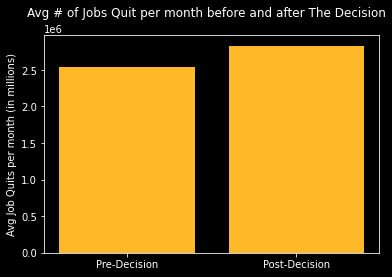

In [31]:
f, ax = plt.subplots()
ax.bar(['Pre-Decision', 'Post-Decision'], [avg_quits_pre, avg_quits_post], color='#FDB927')
ax.set_ylabel('Avg Job Quits per month (in millions)')
f.suptitle(r'Avg # of Jobs Quit per month before and after The Decision')

f.savefig(os.path.join("img", "barplot_pre&post_quits.png"))

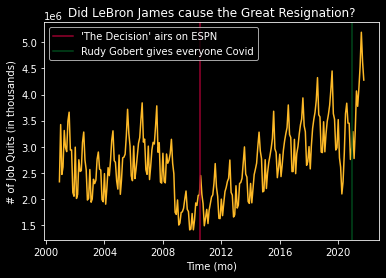

In [29]:
# Plotting line graph of quits with decision airdate in red
f,ax = plt.subplots()
ax.plot(df['date'], df['total_quits'], c='#FDB927')
ax.set_xlabel('Time (mo)')
ax.set_ylabel("# of Job Quits (in thousands)")
ax.set_title("Did LeBron James cause the Great Resignation?")
plt.axvline(the_decision, c='#98002E', label="'The Decision' airs on ESPN")
plt.axvline(rudy_gobert, c='#00471b', label='Rudy Gobert gives everyone Covid')
ax.legend()
plt.show()

f.savefig(os.path.join("img", "time_series_jobquits.png"))

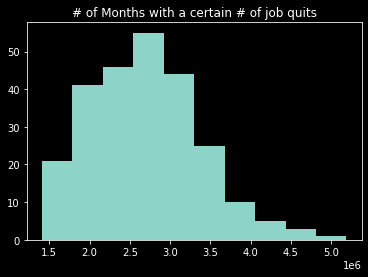

In [30]:
# Let's look at a histogram of job quits

plt.hist(df['total_quits'])
plt.title('# of Months with a certain # of job quits')
plt.show()


In [53]:
# Testing job quits time series for statistical significance
from scipy.optimize import curve_fit

In [51]:
def linModel(m,x,b):
    return m*x + b


In [76]:
# df['date_unix'] = pd.Timestamp(df['date']).timestamp()
df['timestamp']= df['date'].astype('int64')

# Generating fit from datetime/quits series
fitCoeffs, fitCovariances = curve_fit(linModel, df.timestamp, df.total_quits)

print(fitCoeffs, fitCovariances)

m = fitCoeffs[0]
b = fitCoeffs[1]

# Pre-decision
pre_decision['timestamp']= pre_decision['date'].astype('int64')

# Generating fit from datetime/quits series
fitCoeffs_pre, fitCovariances_pre = curve_fit(linModel, pre_decision.timestamp, pre_decision.total_quits)

print(fitCoeffs_pre, fitCovariances_pre)

m_pre = fitCoeffs_pre[0]
b_pre = fitCoeffs_pre[1]

# Post-decision
post_decision['timestamp']= post_decision['date'].astype('int64')

# Generating fit from datetime/quits series
fitCoeffs_post, fitCovariances_post = curve_fit(linModel, post_decision.timestamp, post_decision.total_quits)

print(fitCoeffs_post, fitCovariances_post)

m_post = fitCoeffs_post[0]
b_post = fitCoeffs_post[1]

[1.29795299e-12 1.00539332e+06] [[ 4.36896227e-26 -5.69848224e-08]
 [-5.69848224e-08  7.59121837e+10]]
[-2.20508459e-12  5.02948885e+06] [[ 3.08468740e-25 -3.47582272e-07]
 [-3.47582272e-07  3.94047317e+11]]
[ 5.59582230e-12 -5.32196436e+06] [[ 1.53808493e-25 -2.24074119e-07]
 [-2.24074119e-07  3.28055278e+11]]


/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_4755/2419373763.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['timestamp']= df['date'].astype('int64')
/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_4755/2419373763.py:13: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  pre_decision['timestamp']= pre_decision['date'].astype('int64')
/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_4755/2419373763.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  post_decision['timestamp']= post_decision['date'].astype('int64')


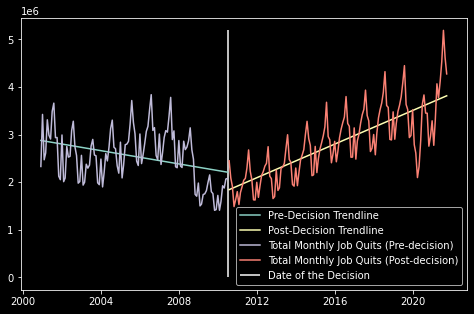

In [84]:
f,ax = plt.subplots(figsize=(8,5))
ax.plot(pre_decision['date'], linModel(m_pre, pre_decision.timestamp, b_pre), label='Pre-Decision Trendline')
ax.plot(post_decision['date'], linModel(m_post, post_decision.timestamp, b_post), label='Post-Decision Trendline')

# Plot actual job quit numbers with models
ax.plot(pre_decision['date'], pre_decision['total_quits'], label='Total Monthly Job Quits (Pre-decision)')
ax.plot(post_decision['date'], post_decision['total_quits'], label='Total Monthly Job Quits (Post-decision)')

ax.vlines(the_decision, ymin=0, ymax=np.max(df['total_quits']), label='Date of the Decision')
ax.legend()


In [85]:
# Printing out 

print(f'Linear model slope pre-decision: {m_pre}')
print(f'Linear model slope post-decision: {m_post}')

Linear model slope pre-decision: -2.205084589159674e-12
Linear model slope post-decision: 5.5958223009913655e-12
